In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def sturges(data): 
    return int((1 + 3.3 * np.log10(len(data))))

df_smart_tv = pd.read_csv('dataset_smart-tv.csv', usecols = ['date_hour','bytes_up', 'bytes_down'])
df_chromecast = pd.read_csv('dataset_chromecast.csv', usecols = ['date_hour','bytes_up', 'bytes_down'])

df_smart_tv[['bytes_up', 'bytes_down']] += 1
df_chromecast[['bytes_up', 'bytes_down']] += 1

df_smart_tv = pd.concat([df_smart_tv["date_hour"], np.log10(df_smart_tv[['bytes_up', 'bytes_down']])], axis=1)
df_chromecast = pd.concat([df_chromecast["date_hour"], np.log10(df_chromecast[['bytes_up', 'bytes_down']])], axis=1)

values = df_smart_tv["date_hour"]
converted_values = []
for x in values:
    try:
        converted_values += [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour]
    except:
        converted_values += [x]

df_smart_tv["date_hour"] = converted_values

values = df_chromecast["date_hour"]
converted_values = []
for x in values:
    try:
        converted_values += [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour]
    except:
        converted_values += [x]

df_chromecast["date_hour"] = converted_values

df_smart_tv, df_chromecast

(         date_hour  bytes_up  bytes_down
 0               15  5.123636    6.449963
 1               15  5.063602    6.354955
 2               15  5.057023    6.363475
 3               15  4.987539    6.302449
 4               15  4.597372    5.906413
 ...            ...       ...         ...
 4417898         23  0.954243    0.954243
 4417899         23  0.954243    0.954243
 4417900         23  0.954243    0.954243
 4417901         23  0.954243    0.954243
 4417902         23  0.954243    1.518514
 
 [4417903 rows x 3 columns],
          date_hour  bytes_up  bytes_down
 0                0  3.475383    4.691848
 1                0  2.836916    2.517536
 2                0  3.652720    4.578812
 3                0  2.890496    2.362105
 4                0  3.488877    4.713136
 ...            ...       ...         ...
 1620524         16  3.306425    4.637820
 1620525         16  3.850585    3.202216
 1620526         16  2.689309    4.695771
 1620527         16  0.000000    2.136721
 16

In [4]:
data_set_1 = df_smart_tv.groupby("date_hour")["bytes_up"].median().argmax()
data_set_2 = df_smart_tv.groupby("date_hour")["bytes_up"].mean().argmax()
data_set_3 = df_smart_tv.groupby("date_hour")["bytes_down"].median().argmax()
data_set_4 = df_smart_tv.groupby("date_hour")["bytes_down"].mean().argmax()
data_set_5 = df_chromecast.groupby("date_hour")["bytes_up"].median().argmax()
data_set_6 = df_chromecast.groupby("date_hour")["bytes_up"].mean().argmax()
data_set_7 = df_chromecast.groupby("date_hour")["bytes_down"].median().argmax()
data_set_8 = df_chromecast.groupby("date_hour")["bytes_down"].mean().argmax()

ds_1 = df_smart_tv.query('date_hour == @data_set_1')['bytes_up']
ds_2 = df_smart_tv.query('date_hour == @data_set_2')['bytes_up']
ds_3 = df_smart_tv.query('date_hour == @data_set_3')['bytes_down']
ds_4 = df_smart_tv.query('date_hour == @data_set_4')['bytes_down']
ds_5 = df_chromecast.query('date_hour == @data_set_7')['bytes_up']
ds_6 = df_chromecast.query('date_hour == @data_set_8')['bytes_up']
ds_7 = df_chromecast.query('date_hour == @data_set_7')['bytes_down']
ds_8 = df_chromecast.query('date_hour == @data_set_8')['bytes_down']

corr_13 = ds_1.corr(ds_3)
corr_24 = ds_2.corr(ds_4)
corr_57 = ds_5.corr(ds_7)
corr_68 = ds_6.corr(ds_8)

corr_13, corr_24, corr_57, corr_68

(0.9156089964784166,
 0.9156089964784166,
 0.7925043015217009,
 0.7925043015217009)

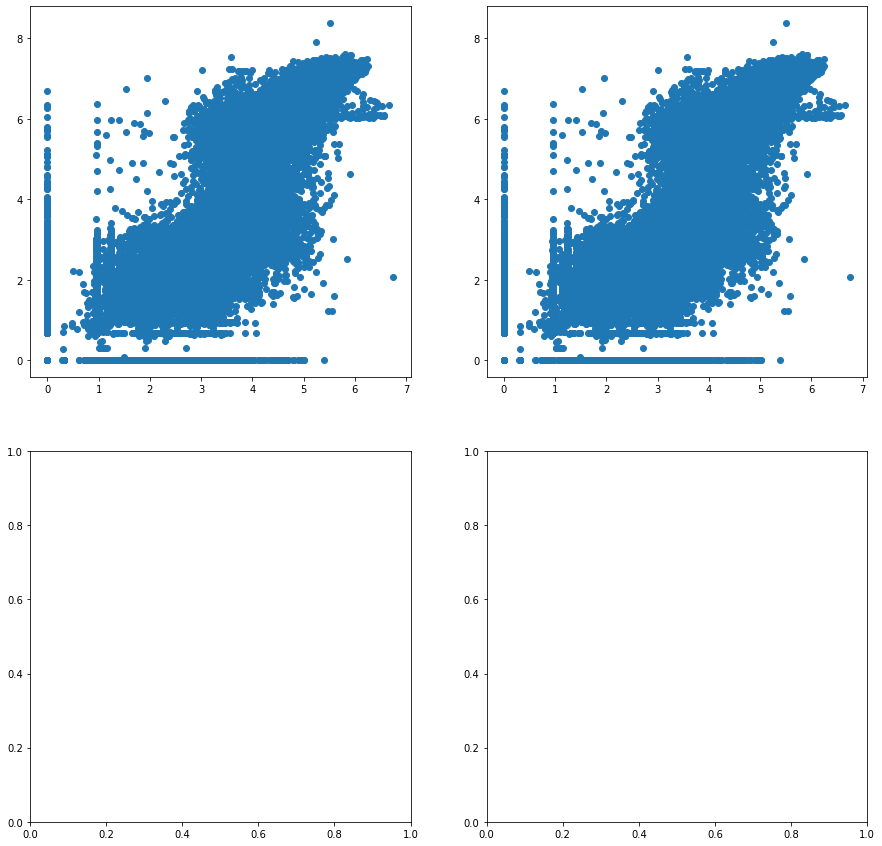

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].scatter(ds_1, ds_3)
ax[0][1].scatter(ds_2, ds_4)
ax[1][0].scatter(ds_5, ds_7)
ax[1][1].scatter(ds_6, ds_8)

plt.show()